In [1]:
import easyocr

In [9]:
#Imports
import easyocr
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_local
from PIL import Image
from pytesseract import Output

In [10]:
# bu adres benim macbook icin cikan sonuc
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'  # Replace with the path to your Tesseract executable

### Cikti veren  fotograflar
1, 5, 7, 9, 10, 12, 14, 15 

Duzenlenmis hali ile sadece 13 den cikti alinmistir.

Png formatindan cikti alinanlar:

3, 6, 10, 11, 13

In [21]:
from PIL import Image  # Make sure to install the Pillow library: pip install pillow
import pytesseract

# Open an image using PIL (Python Imaging Library)
image_path = 'Label_1.jpeg'
img = Image.open(image_path)

# Perform OCR on the image
text = pytesseract.image_to_string(img)

# Print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
. 1 G

JSPS GROUND a;

e710 souurions
Sn ast eaceRs elect
BOCA RATON FL 32487

42.0007

ONEAMEAYSEGUL DEWIZ oNER
120 GETTY AVE # ONEAM?-368839,
‘CLIFTON NY 07011-2122.




# Extracting number Part

In [12]:
prefixes_to_search = ['ONE RN', '# GNEANZ—', '# ONEAM2-', '# ONEAM?-', '# ‘ONEAMZ —', '# ONEANZ-', 'PONEAM?', 'ONEAMZ —', 'AVE # ONEAMZ-', '# ONEAMZ', 'ONEAMZ-', 'ONEAMZ—']

extracted_number = None

for prefix in prefixes_to_search:
    if prefix in text:
        index = text.find(prefix) + len(prefix)
        after_prefix = text[index:]

        number = ''
        for char in after_prefix:
            if char.isdigit():
                number += char
            elif number:
              
                break
        
        if number:
            extracted_number = number
            break

if extracted_number is not None:
    print(f"Extracted Number: {extracted_number}")
else:
    print("No matching prefix found in the OCR output.")


Extracted Number: 365420


In [13]:
img = cv2.imread('Label_6.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, final = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Perform OCR on the image
text = pytesseract.image_to_string(final)

# Print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
CARRIER — LEAVE IF NO RESPONSE
ADDRESS SERVICE REQUESTED

0205697663124

ONEANZ - ILYAS SUMER,
420 GETTY AVE
4 ONEAMZ— 364974 SUITE * 8692

CLIFTON NU 07051— 2122

IRFACE MAIL ONLY, LITHIUM ION
BAI ERE 5, Ponto oR TaanePont

USPS TRACKING # HAZMAT eVS

HLA

9339 5896 9102 4569 7663 11

BDL2 EWRS5
Fawes = yo19

SmOYs A} PUR SOLAOU

Hurwuealys oapla



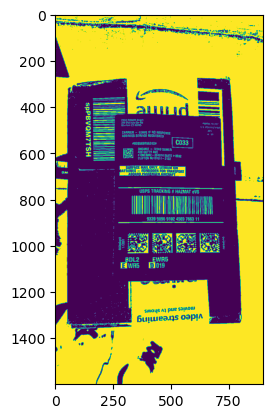

In [14]:
plt.imshow(final)

In [ ]:
import cv2
import pytesseract


image = cv2.imread('yeni_15.jpeg')

# OCR işlemi ve bounding box bilgilerini elde etme
d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:  # Güven düzeyi %60'tan yüksek olan metinler
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


cv2.imshow('Image with Green Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [263]:
cv2.imwrite('isaretlenmis_15.png', image)


True

Yukaridaki islemlerde okuttugumuz labellarin uzerinde okunabilen yazilari yesil kutucuklar icine aldik ve "yen_" diye baslayan bir formatta kaydettik.

#### Kamera acma ve okutma

In [13]:
import cv2
import pytesseract


# Kamera ayarları
cap = cv2.VideoCapture(0)  

while True:
    # Kameradan görüntüyü yakala
    ret, frame = cap.read()
    if not ret:
        break

    # OCR işlemi ve bounding box bilgilerini elde etme
    d = pytesseract.image_to_data(frame, output_type=pytesseract.Output.DICT)

    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if 'ONEAMZ' in d['text'][i]:  # 'ONEAMZ' içeren metin bulundu
            for j in range(i + 1, n_boxes):
                if d['text'][j].isdigit():  # 'ONEAMZ' kelimesinden sonra gelen sayısal metin
                    (x, y, w, h) = (d['left'][j], d['top'][j], d['width'][j], d['height'][j])
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Kırmızı kutu çiz
                    break  

    # İşlenmiş görüntüyü göster
    cv2.imshow('Kamera', frame)

    # 'q' tuşuna basıldığında döngüden çık
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Kamera ve tüm pencereleri serbest bırak
cap.release()
cv2.destroyAllWindows()


### Easy OCR
Burada OCR ile tum fotograflardaki yazilar okutulmus ve sonuc asagidaki gibidir. Daha sonra tum forograflarin kordinatlari tek tek bulunup sadece label in adres kismi gorunecek sekilde zoomlama islemiyle yeni fotograflar ayarlanmistir.

In [16]:
image_paths = [
    "Label_1.jpeg",
    "Label_2.jpeg",
    "Label_3.jpeg",
    "Label_4.jpeg",
    "Label_5.jpeg",
    "Label_6.jpeg",
    "Label_7.jpeg",
    "Label_8.jpeg",
    "Label_9.jpeg",
    "Label_10.jpeg",
    "Label_11.jpeg",
    "Label_12.jpeg",
    "Label_13.jpeg",
    "Label_14.jpeg",
    "Label_15.jpeg"
]

# Dictionary to hold the image paths and their corresponding OCR output
ocr_results = {}

# Perform OCR on each image
for path in image_paths:
    image = Image.open(path)
    text = pytesseract.image_to_string(image)
    # Find the ONEAMZ number in the text using regular expressions
    ocr_results[path] = text

ocr_results



{'Label_1.jpeg': '. 1 G\n\nJSPS GROUND a;\n\ne710 souurions\nSn ast eaceRs elect\nBOCA RATON FL 32487\n\n42.0007\n\nONEAMEAYSEGUL DEWIZ oNER\n120 GETTY AVE # ONEAM?-368839,\n‘CLIFTON NY 07011-2122.\n\n',
 'Label_2.jpeg': 'tr US POSTAGE & FEES PAID\n\nUSP na VANTAGE"! ;\n\nECOMMERCE DEPT\n\nTeddy Moises Daytona Harley-Davidsor\n1637 nN US Fwy\n\nORMOND BEAGH FL 32174\n\n‘Teun, “wueae\nONEANZ - AYSENUR ERDOGDU\n\n420 GETTY AVE # ONEAMZ\nCLIFTON NJ 07011\n\nSHIP\n\nUSPS TRACKING #\n\n“TMT\n\n9434 6112 0621 6860 1429 96\n\nee\n\n',
 'Label_3.jpeg': 'CARRIER — LEAVE IF No RESPONSE\nADDRESS SERVICE REQUESTED\n\n#9565457247024 C033\n\nSeLENAY ABOOULAYE AMADOU\n\ny AV\nFea2--Sosez0 SUITE #111239\nGUeTON NU 070112122\n\nUSPS TRACKING # eVS\n\nt Sil VMN\n\n9361 2896 9102 4545 7247 08\nif\nwoe ae\nfalwrs | Blo19\n\n',
 'Label_4.jpeg': 'PRIORITY MAIL\n\nuc\n\n9205 5902 4978 6960 0057 0962\n\n',
 'Label_5.jpeg': 'usps ERORES MAIL ®\n\nShipping Department\nClearly jeitered. com 0001\net Arroyo Vista

In [17]:
from PIL import Image

image = Image.open('Label_15.jpeg')

# Kırpılacak bölgenin koordinatlarını (sol üst x, sol üst y, sağ alt x, sağ alt y) belirle
# Bu koordinatlar, görüntünün adres bölümünün yerini temsil etmelidir.
# Örneğin:
left =50
top = 60
right = 750
bottom = 1250


cropped_image = image.crop((left, top, right, bottom))

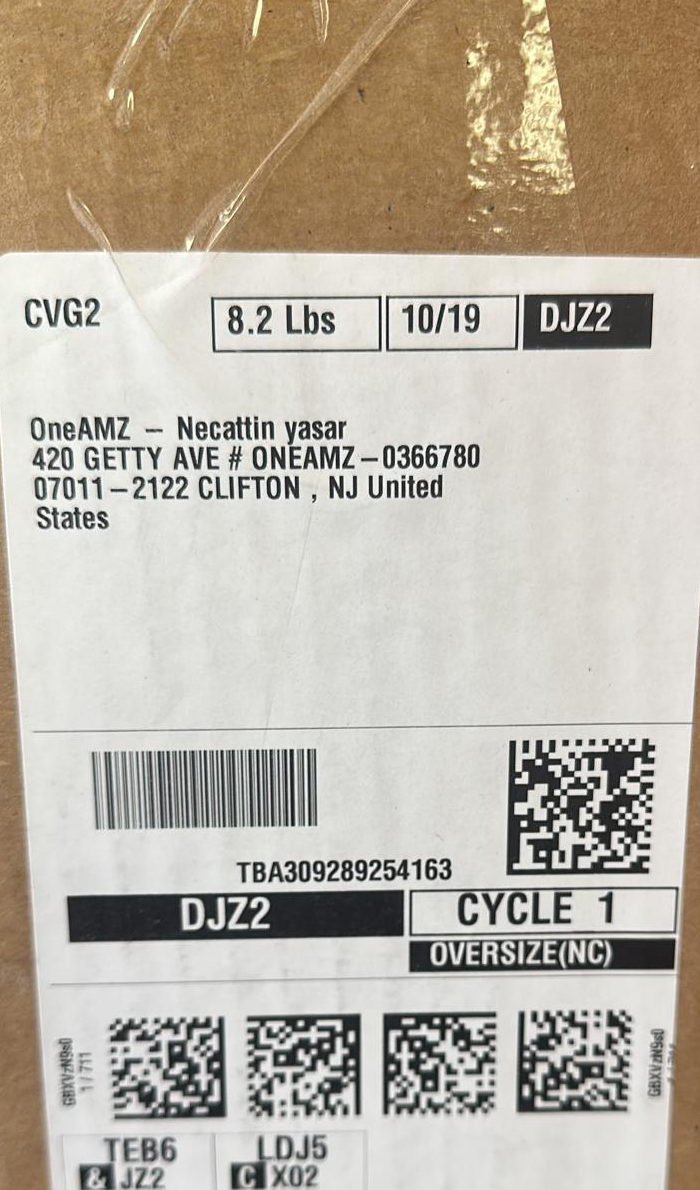

In [18]:
cropped_image

In [19]:
# zoomladigimiz fotografi kaydediyoruz
cropped_image.save('yeni_15.jpeg')
# veya
cropped_image.show()

# Daha sonra kırpılmış görüntüyü OCR için kullanabilirsiniz
text = pytesseract.image_to_string(cropped_image)

In [284]:
image_paths = [
    "yeni_1.jpeg",
    "yeni_2.jpeg",
    "yeni_3.jpeg",
    "yeni_4.jpeg",
    "yeni_5.jpeg",
    "yeni_6.jpeg",
    "yeni_7.jpeg",
    "yeni_8.jpeg",
    "yeni_9.jpeg",
    "yeni_10.jpeg",
    "yeni_11.jpeg",
    "yeni_12.jpeg",
    "yeni_13.jpeg",
    "yeni_14.jpeg",
    "yeni_15.jpeg"
]

# Dictionary to hold the image paths and their corresponding OCR output
ocr_results = {}

# Perform OCR on each image
for path in image_paths:
    image = Image.open(path)
    text = pytesseract.image_to_string(image)
    # Find the ONEAMZ number in the text using regular expressions
    ocr_results[path] = text

ocr_results

{'yeni_1.jpeg': 'sam . fel\nty its T ro7r2a\nBch ANTON SH\n\natt From 23487\n| Weszan0r\n\nONEAMEAYSEGUL DEWIZ owER\n420 GETTY AVE # OEAMZ-264839\nCLIFTON MI 07011-2122\n\n',
 'yeni_2.jpeg': 'EA FEESPAID\n2 LB GROUND ADVANTAGE RATE\nZon\nComBasPrica\n\nee\n\nBe\n1016/2022] f\n\n|\nUSPS GROUND ADVANTAGE™\nE\n\n“addy Noraes Daytona Harley-Davidson 0003\n1637 NUS HWY.\n\nORMOND BEACH FL 32174\n\n‘Teun, “wuea8t\nSHIP\n\nONEAMZ - AYSENUR ERDOGDU\n420 GETTY AVE # ONEAMZ\n\nCLIFTON NJ 07011\n\nUSPS TRACKING #\n\nww i\n\n',
 'yeni_3.jpeg': "1 @\n\n‘CARRIER ~ LEAVE IF NO RESPONSE\nADDRESS SERVICE REQUESTED ——+\n\n#9565457247024 C033 j\nuiyse ONEAMZ— SLENAY ABDOULAYE AMADOU ;\nRee 20 GETTY A i\n\nHONEAMZ 360 Sue # 111239\nCLIFTON NJ 07011 i\n\n) V' a\n\nUSPS TRACKING # eVS :\n\n= TM\n\n9361 2896 9102 4545 7247 08\n\nBDL3 ad aie\n\nTlwrs 019\n",
 'yeni_4.jpeg': '',
 'yeni_5.jpeg': 'Rab\nUSPS PRIORITY MAIL\n\nShipping Department\n\nClearly iitered com eeu:\n23121 Arroyo Vista\n\nSte B\n\nRCHO STA 